In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Tue Dec  8 11:57:46 2020

@author: can
"""

#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  6 23:36:19 2020

@author: can
"""

import math
import numpy as np
import matplotlib.pyplot as plt
import random
import cvxpy as cp
import os
os.chdir("/Users/can/Desktop/phd/Rotation1_Ashok_Cutkosky/code")

## Generate Data Set
Let' s create a linearly separable two dimensional data centered around zero. Generated data set includes 1000 points in total of which 100 points are outlier.

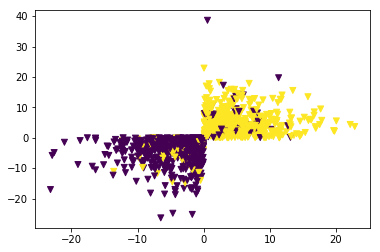

In [2]:
from generate_data import generate_2d_binary_class_data

tr_z,tr_y=generate_2d_binary_class_data()

tr_z=tr_z-0
tr_z=tr_z/1


f, ax = plt.subplots(1)
#ax.set_xlim((0,iteration_no+5))
#ax.set_ylim(-5,200)
ax.scatter(x=tr_z[:,0],y=tr_z[:,1],c=tr_y[:,0],marker='v')
f

#ones=np.repeat(-1.0,len(tr_z)).reshape(len(tr_z),1)
#tr_z=np.concatenate((tr_z,ones),1)

no_sample=len(tr_z)
no_f=len(tr_z[0,])

## Online Convex Optimization Algroithm

An Online Convex Optimization Algorithm minimizing hinge loss is implemented in this section. This algorithm is proposed in "Matrix-Free Preconditioning in Online Learning" by Ashok Cutkosky and Tamas Sarlos. A detailed regret analysis of the algorithm is provided in the paper by using the duality between wealth of a coin betting algorithm and its regret. The study shows that the algorithm enjoys better regret bounds than algorithms with full-matrix preconditioning when sum of the gradients is greater than the regret of some base algorithm. In addition to this, the regret of the algorithm is always as good as the regret bounds of algorithms that employ diagonal preconditioning. 

In [3]:
from recursive_optimizer import recursive_optimizer_algo

epsilon=0.5
eta=0.5
loss_type="hinge"
method1=recursive_optimizer_algo(epsilon,tr_z,tr_y,eta,loss_type,intercept=True)

wealth_list=[]     # keeps the current wealth at each iteration
total_loss_list=[] #keeps the total hinge loss due to weights
gradient_list=[]   #to check the distribution of gradients on 2d plot.
t=0
for t in range(len(tr_y)):
            method1.optimizer1()
            method1.optimizer2()
            
            #some performance measures
            
            ###change in wealth
            wealth_list.append(method1.wealth_algo1)
            ###
            
            ###change in total hinge loss w.r. to weights
            loss_iter=(1 - np.dot(method1.tr_z,method1.weights) * tr_y.flatten())
            loss_iter=sum(loss_iter[loss_iter>0])
            total_loss_list.append(loss_iter)
            ###
            
            ###gradient distribution
            gradient_list.append(method1.gradient)
            ###
            
            
            method1.optimizer3()
method1.w_t_i

array([0.06679901, 0.06136013, 0.00724893])

Last coefficient above (~0.0072) represents the intercept. See that it is almost 0.
## Performance Measures

### Total Error vs Iteration


Text(0.5,1,'Total Error vs Iteration')

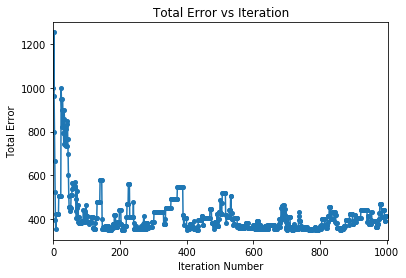

In [4]:
"""Total Error vs Iteration Plot"""            
            
f, ax = plt.subplots(1)
ax.set_xlim((0,len(total_loss_list)+5))
#ax.set_ylim(500,1500)
ax.plot(range(0,len(total_loss_list),1),total_loss_list,marker='o',markersize=4)
ax.set_xlabel("Iteration Number")
ax.set_ylabel("Total Error")
ax.set_title("Total Error vs Iteration")
#f

### Wealth vs Iteration

Text(0.5,1,'Wealth vs Iteration')

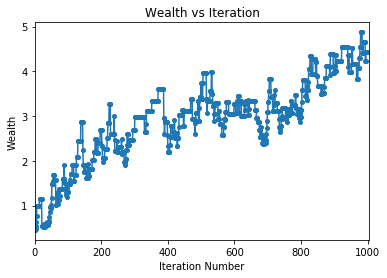

In [5]:
"""Wealth vs Iteration Plot"""            
            
f, ax = plt.subplots(1)
ax.set_xlim((0,len(wealth_list)+5))
#ax.set_ylim(500,1500)
ax.plot(range(0,len(wealth_list),1),wealth_list,label="Ranking-CG",marker='o',markersize=4)
ax.set_xlabel("Iteration Number")
ax.set_ylabel("Wealth")
ax.set_title("Wealth vs Iteration")
#f

### Scatter Plot of Evaluated Gradients

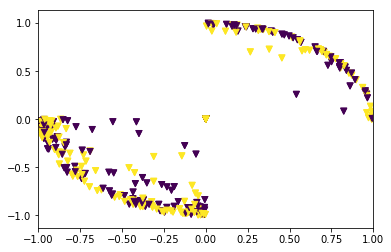

In [6]:
grad=np.array(gradient_list)
"""gradient scatter plot"""
f, ax = plt.subplots(1)
ax.set_xlim((-1,1))
#ax.set_ylim(-5,200)
ax.scatter(x=grad[:,0].flatten(),y=grad[:,1].flatten(),c=tr_y[:,0],marker='v')
ax.scatter(x=grad[:,0].flatten(),y=grad[:,1].flatten(),c=tr_y[:,0],marker='v')
#f

